# Feature Extraction and Data Virtualization
In this exercise we will be studying the effects of various dimensionality reduction methods on the MNIST dataset. Namely, Principle Component Analysis and Linear Discriminant Analysis.

In [1]:
# some startup
import numpy as np
import src.data_utils as util

We will select all training images of digits ‘3’, ‘5’ and ‘9’.

In [2]:
path_to_dataset = 'data/datasets'

# https://raw.githubusercontent.com/amitgroup/amitgroup/master/amitgroup/io/mnist.py
X_train, y_train = util.load_mnist('training', digits=[3,5,9], path=path_to_dataset, return_labels=True)

print 'Train data shape: ', X_train.shape
print 'Train label shape: ', y_train.shape

Train data shape:  (17501, 28, 28)
Train label shape:  (17501,)


# Estimate the PCA projection matrices
We want to plot the total distortion errors of these images as a function of the used PCA dimensions (such as 2, 10, 50, 100, 200, 300).

In [3]:
# organize the dataset
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
assert X_train.shape == (17501,784), "The matrix must have shape 17501x784"
print 'Train data shape: ', X_train.shape

Train data shape:  (17501, 784)


In [4]:
# calculate the empirical mean along each dimension
mean = np.mean(X_train, axis=0)
print 'Mean shape: ', mean.shape

Mean shape:  (784,)


In [5]:
# calculate data deviations from the mean (mean-centering our feature space)
B = X_train - mean

# find the covariance matrix (outer-product / n-1)
cov = (1.0 / (B.shape[0]-1)) * (np.dot(B.T,B))
print 'Covariance matrix shape: ', cov.shape

# verify our result
np.testing.assert_array_almost_equal(cov, np.cov(B.T)) # no output means it passed

Covariance matrix shape:  (784, 784)


In [6]:
# find the eigenvectors and eigenvalues of the covariance matrix
eig_val, eig_vec = np.linalg.eigh(cov)
print 'Eigenvector shape: ', eig_vec.shape
print 'Eivenvalue shape: ', eig_val.shape

Eigenvector shape:  (784, 784)
Eivenvalue shape:  (784,)


Let's quickly verify our result. It must satisfy the equation:

Σv = λv

where

Σ = Covariance matrix

v = Eigenvector

λ = Eigenvalue

There should be no output. Otherwise, they are not equal.

In [7]:
for i in range(len(eig_val)):
    np.testing.assert_array_almost_equal(cov.dot(eig_vec[:,i]), eig_val[i] * eig_vec[:,i],
                                         decimal=6, err_msg='Not equal', verbose=True)

Our goal is to reduce the dimensionality of our feature space by projecting it onto a smaller subspace. Our eigenvectors represent the axes of this subspace, but they only define the direction of the axes since they are unit length:

In [8]:
for ev in eig_vec:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev)) # no output means it passed

In order to decide which axes (eigenvectors) we want to drop from our feature space, we must inspect their corresponding eigenvalues. The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.

We must sort the eigenvectors from highest to lowest corresponding eigenvalue and choose the top k eigenvectors.

In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

Now we must choose k eigenvectors with the largest eigenvalues. We will choose values 2, 10, 50, 100, 200, and 300.

In [10]:
top_2 = np.array([eig_pairs[i][1] for i in range(2)]).T
top_10 = np.array([eig_pairs[i][1] for i in range(10)]).T
top_50 = np.array([eig_pairs[i][1] for i in range(50)]).T
top_100 = np.array([eig_pairs[i][1] for i in range(100)]).T
top_200 = np.array([eig_pairs[i][1] for i in range(200)]).T
top_300 = np.array([eig_pairs[i][1] for i in range(300)]).T
all = np.array([eig_pairs[i][1] for i in range(len(eig_val))]).T
print 'Top 2 eigenvectors shape: ', top_2.shape
print 'Top 10 eigenvectors shape: ', top_10.shape
print 'Top 50 eigenvectors shape: ', top_50.shape
print 'Top 100 eigenvectors shape: ', top_100.shape
print 'Top 200 eigenvectors shape: ', top_200.shape
print 'Top 300 eigenvectors shape: ', top_300.shape
print 'All eigenvectors shape: ', all.shape

Top 2 eigenvectors shape:  (784, 2)
Top 10 eigenvectors shape:  (784, 10)
Top 50 eigenvectors shape:  (784, 50)
Top 100 eigenvectors shape:  (784, 100)
Top 200 eigenvectors shape:  (784, 200)
Top 300 eigenvectors shape:  (784, 300)
All eigenvectors shape:  (784, 784)


We will now transform our feature space to a new subspace. Shortening the dimensions from (17501, 784) to (17501, k).

In [11]:
# projection onto used PCA dims
transformed_2 = B.dot(top_2)
transformed_10 = B.dot(top_10)
transformed_50 = B.dot(top_50)
transformed_100 = B.dot(top_100)
transformed_200 = B.dot(top_200)
transformed_300 = B.dot(top_300)
transformed_all = B.dot(all)
print 'Transformed features (2 dim) shape: ', transformed_2.shape
print 'Transformed features (10 dim) shape: ', transformed_10.shape
print 'Transformed features (50 dim) shape: ', transformed_50.shape
print 'Transformed features (100 dim) shape: ', transformed_100.shape
print 'Transformed features (200 dim) shape: ', transformed_200.shape
print 'Transformed features (300 dim) shape: ', transformed_300.shape
print 'Transformed features (784 dim) shape: ', transformed_all.shape
assert transformed_2.shape == (17501,2), "The matrix must have shape 17501x2."
assert transformed_10.shape == (17501,10), "The matrix must have shape 17501x10."
assert transformed_50.shape == (17501,50), "The matrix must have shape 17501x50."
assert transformed_100.shape == (17501,100), "The matrix must have shape 17501x100."
assert transformed_200.shape == (17501,200), "The matrix must have shape 17501x200."
assert transformed_300.shape == (17501,300), "The matrix must have shape 17501x300."
assert transformed_all.shape == (17501,784), "The matrix must have shape 17501x784."

Transformed features (2 dim) shape:  (17501, 2)
Transformed features (10 dim) shape:  (17501, 10)
Transformed features (50 dim) shape:  (17501, 50)
Transformed features (100 dim) shape:  (17501, 100)
Transformed features (200 dim) shape:  (17501, 200)
Transformed features (300 dim) shape:  (17501, 300)
Transformed features (784 dim) shape:  (17501, 784)


Let's plot the total distortion errors of these images as a function of the used PCA dimensions.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# map back to original feature space
#  (to do this in one step do X_train.dot(top_k.dot(top_k.T)) where top_k.dot(top_k.T) is the projection)
#  (if all eigenvectors are used, the projection should be an identity)
X_train_2 = transformed_2.dot(top_2.T)
X_train_10 = transformed_10.dot(top_10.T)
X_train_50 = transformed_50.dot(top_50.T)
X_train_100 = transformed_100.dot(top_100.T)
X_train_200 = transformed_200.dot(top_200.T)
X_train_300 = transformed_300.dot(top_300.T)
X_train_all = transformed_all.dot(all.T)

# let's just check if all*all.T is an identity
np.testing.assert_array_almost_equal(np.identity(784), all.dot(all.T))

# final reconstruction step: add back the mean
X_train_2 += mean
X_train_10 += mean
X_train_50 += mean
X_train_100 += mean
X_train_200 += mean
X_train_300 += mean
X_train_all += mean

print 'Reconstructed features shape (k = 2): ', X_train_2.shape
print 'Reconstructed features shape (k = 10): ', X_train_10.shape
print 'Reconstructed features shape (k = 50): ', X_train_50.shape
print 'Reconstructed features shape (k = 100): ', X_train_100.shape
print 'Reconstructed features shape (k = 200): ', X_train_200.shape
print 'Reconstructed features shape (k = 300): ', X_train_300.shape
print 'Reconstructed features shape (k = 784): ', X_train_all.shape
assert X_train_2.shape == (17501,784), "The matrix must have shape 17501x784."
assert X_train_10.shape == (17501,784), "The matrix must have shape 17501x784."
assert X_train_50.shape == (17501,784), "The matrix must have shape 17501x784."
assert X_train_100.shape == (17501,784), "The matrix must have shape 17501x784."
assert X_train_200.shape == (17501,784), "The matrix must have shape 17501x784."
assert X_train_300.shape == (17501,784), "The matrix must have shape 17501x784."
assert X_train_all.shape == (17501,784), "The matrix must have shape 17501x784."

Reconstructed features shape (k = 2):  (17501, 784)
Reconstructed features shape (k = 10):  (17501, 784)
Reconstructed features shape (k = 50):  (17501, 784)
Reconstructed features shape (k = 100):  (17501, 784)
Reconstructed features shape (k = 200):  (17501, 784)
Reconstructed features shape (k = 300):  (17501, 784)
Reconstructed features shape (k = 784):  (17501, 784)


/Users/matthewtesfaldet/Desktop/project1/.env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


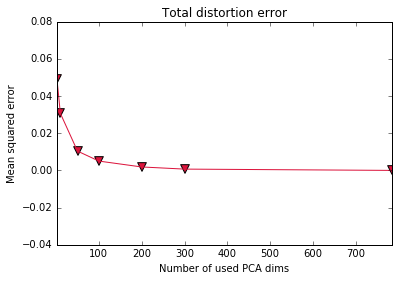

In [13]:
# calculate mean squared error from original
dims_used = [2,10,50,100,200,300,784]
errors = [np.mean((X_train - X_train_2)**2).round(6),
         np.mean((X_train - X_train_10)**2).round(6),
         np.mean((X_train - X_train_50)**2).round(6),
         np.mean((X_train - X_train_100)**2).round(6),
         np.mean((X_train - X_train_200)**2).round(6),
         np.mean((X_train - X_train_300)**2).round(6),
         np.mean((X_train - X_train_all)**2).round(6)]

# plot error with respect to number of dimensions used
plt.scatter(dims_used, errors, s=75, marker='v', c='crimson')
plt.plot(dims_used, errors, c='crimson')
plt.xlim([2,784])
plt.xlabel('Number of used PCA dims')
plt.ylabel('Mean squared error')
plt.legend()
plt.title('Total distortion error')
plt.show()

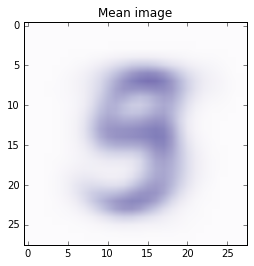

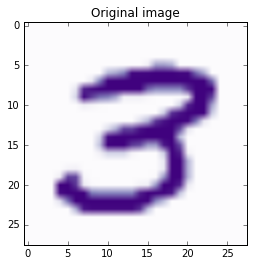

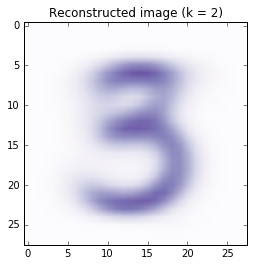

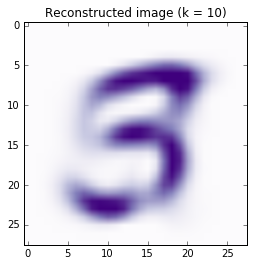

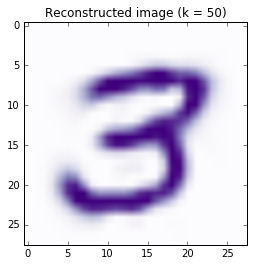

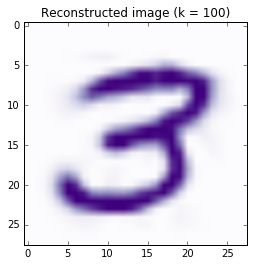

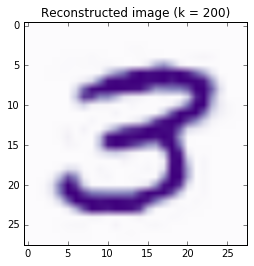

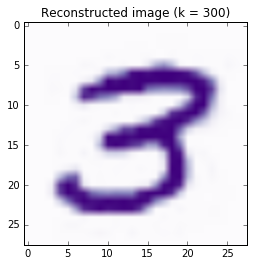

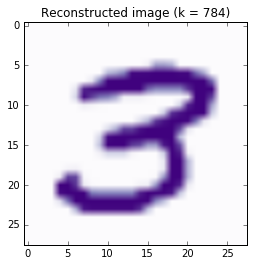

In [14]:
# compare reconstructed images with original and mean
plt.title('Mean image')
plt.imshow(mean.reshape((28, 28)), cmap="Purples", vmin=0, vmax=1)
plt.show()

plt.title('Original image')
plt.imshow(X_train[50].reshape((28, 28)), cmap="Purples", vmin=0, vmax=1)
plt.show()

plt.title('Reconstructed image (k = 2)')
plt.imshow(X_train_2[50].reshape((28, 28)), cmap="Purples", vmin=0, vmax=1)
plt.show()

plt.title('Reconstructed image (k = 10)')
plt.imshow(X_train_10[50].reshape((28, 28)), cmap="Purples", vmin=0, vmax=1)
plt.show()

plt.title('Reconstructed image (k = 50)')
plt.imshow(X_train_50[50].reshape((28, 28)), cmap="Purples", vmin=0, vmax=1)
plt.show()

plt.title('Reconstructed image (k = 100)')
plt.imshow(X_train_100[50].reshape((28, 28)), cmap="Purples", vmin=0, vmax=1)
plt.show()

plt.title('Reconstructed image (k = 200)')
plt.imshow(X_train_200[50].reshape((28, 28)), cmap="Purples", vmin=0, vmax=1)
plt.show()

plt.title('Reconstructed image (k = 300)')
plt.imshow(X_train_300[50].reshape((28, 28)), cmap="Purples", vmin=0, vmax=1)
plt.show()

plt.title('Reconstructed image (k = 784)')
plt.imshow(X_train_all[50].reshape((28, 28)), cmap="Purples", vmin=0, vmax=1)
plt.show()

Let's compare with the PCA function from the sklearn library. It should be the same.

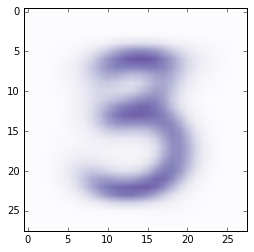

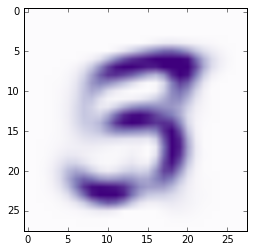

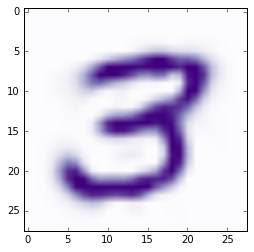

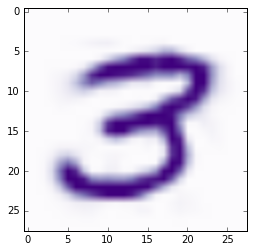

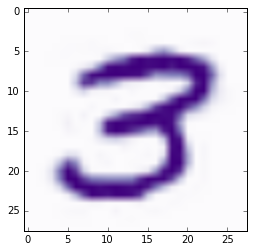

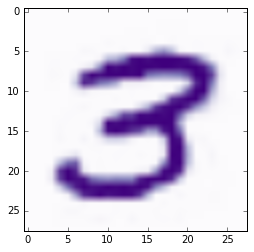

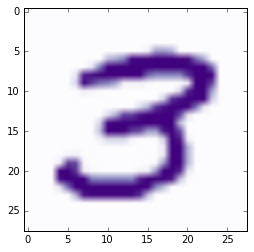

In [15]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA()
pca.fit(X_train)

mu = np.mean(X_train, axis=0)

transformed = pca.transform(X_train)
components = pca.components_

for i in range(len(dims_used)):
    Xhat = np.dot(transformed[:,:dims_used[i]], components[:dims_used[i],:])
    Xhat += mu
    plt.imshow(Xhat[50].reshape((28,28)), cmap='Purples', vmin=0, vmax=1)
    plt.show()

# Project all images into 2D space
We'll be using PCA and Linear Discriminant Analysis to project all the images we chose into 2D space. We'll plot each class with different colours. The classes are '3', '5', and '9'.

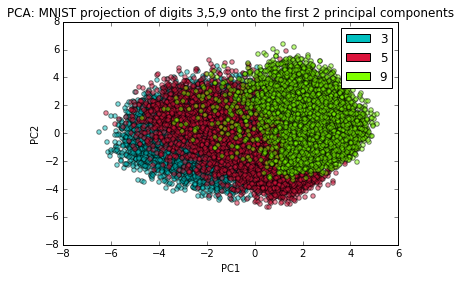

In [16]:
# PCA projection onto 2D

# digit '3'
indices_3 = np.where(y_train == 3)[0]
x_3 = transformed_2[indices_3,0].squeeze()
y_3 = transformed_2[indices_3,1].squeeze()
plt.scatter(x_3, y_3, marker='o', c='c', alpha=0.5)

# digit '5'
indices_5 = np.where(y_train == 5)[0]
x_5 = transformed_2[indices_5,0].squeeze()
y_5 = transformed_2[indices_5,1].squeeze()
plt.scatter(x_5, y_5, marker='o', c='crimson', alpha=0.5)

# digit '9'
indices_9 = np.where(y_train == 9)[0]
x_9 = transformed_2[indices_9,0].squeeze()
y_9 = transformed_2[indices_9,1].squeeze()
plt.scatter(x_9, y_9, marker='o', c='chartreuse', alpha=0.5)

# creates 3 Rectangles
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='c')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='crimson')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='chartreuse')

# adds the legend into plot
plt.legend((p1, p2, p3), ('3', '5', '9'), loc='best')

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.title('PCA: MNIST projection of digits 3,5,9 onto the first 2 principal components')

plt.show()

As you can see, the data has been mean centered and there's a good amount of energy captured using these PCA dimensions, but there's plenty of overlap between classes. We want to create a better class separation while maintaining high variance within each class. This is where LDA comes in.

# LDA projection onto 2D

In [39]:
# grab digits
X_train_3 = X_train[indices_3,:].squeeze()
X_train_5 = X_train[indices_5,:].squeeze()
X_train_9 = X_train[indices_9,:].squeeze()

# calculate the empirical means for each class along each dimension
mean_3 = np.mean(X_train_3, axis=0)
mean_5 = np.mean(X_train_5, axis=0)
mean_9 = np.mean(X_train_9, axis=0)
print 'Mean for digit 3 shape: ', mean_3.shape
print 'Mean for digit 5 shape: ', mean_5.shape
print 'Mean for digit 9 shape: ', mean_9.shape

Mean for digit 3 shape:  (784,)
Mean for digit 5 shape:  (784,)
Mean for digit 9 shape:  (784,)


In [40]:
# calculate data deviations from the means (mean-centering our feature space)
B_3 = X_train_3 - mean_3
B_5 = X_train_5 - mean_5
B_9 = X_train_9 - mean_9

# instead of finding the covariances, we'll find the scatter matrices for each class
#  (equal to the outer-product)
S_3 = np.dot(B_3.T,B_3)
S_5 = np.dot(B_5.T,B_5)
S_9 = np.dot(B_9.T,B_9)

# within-class scatter matrix
S_W = S_3 + S_5 + S_9
print 'Within-class scatter matrix shape: ', S_W.shape

Within-class scatter matrix shape:  (784, 784)


In [41]:
N_3 = X_train_3.shape[0]
N_5 = X_train_5.shape[0]
N_9 = X_train_9.shape[0]

mean_3_diff = np.vstack(mean_3 - mean)
mean_5_diff = np.vstack(mean_5 - mean)
mean_9_diff = np.vstack(mean_9 - mean)

# calculate the between-class scatter matrix
S_3 = N_3 * np.dot(mean_3_diff,mean_3_diff.T)
S_5 = N_5 * np.dot(mean_5_diff,mean_5_diff.T)
S_9 = N_9 * np.dot(mean_9_diff,mean_9_diff.T)
S_B = S_3 + S_5 + S_9
print 'Between-class scatter matrix shape: ', S_B.shape

Between-class scatter matrix shape:  (784, 784)


We must solve the generalized eigenvalue problem for the matrix $~S_W^{-1}S_B$.

In [68]:
A = np.linalg.pinv(S_W).dot(S_B) # uses SVD instead of solving the inverse directly, used if there are a lot of features
eig_val, eig_vec = np.linalg.eig(A)
print 'Eigenvector shape: ', eig_vec.shape
print 'Eivenvalue shape: ', eig_val.shape

Eigenvector shape:  (784, 784)
Eivenvalue shape:  (784,)


Let's quickly verify our result. It must satisfy the equation:

Av = λv

where

A = $~S_W^{-1}S_B$

v = Eigenvector

λ = Eigenvalue


In [69]:
for i in range(len(eig_val)):
    np.testing.assert_array_almost_equal(A.dot(eig_vec[:,i]), eig_val[i] * eig_vec[:,i],
                                         decimal=6, err_msg='Not equal', verbose=True) # no output means it passed

Just like for PCA, let's choose the top k eigenvectors.

In [70]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

Since we're projecting to 2D space, let's pick the top 2 eigenvectors with the highest corresponding eigenvalues.

In [57]:
top_2 = np.array([eig_pairs[i][1] for i in range(2)]).T
print 'Top 2 eigenvectors shape: ', top_2.shape

Top 2 eigenvectors shape:  (784, 2)


We will now transform our feature space to a new subspace. Shortening the dimensions from (17501, 784) to (17501, k).

In [58]:
# projection onto used LDA dims
transformed_2 = B.dot(top_2)
print 'Transformed features (2 dim) shape: ', transformed_2.shape
assert transformed_2.shape == (17501,2), "The matrix must have shape 17501x2."

Transformed features (2 dim) shape:  (17501, 2)


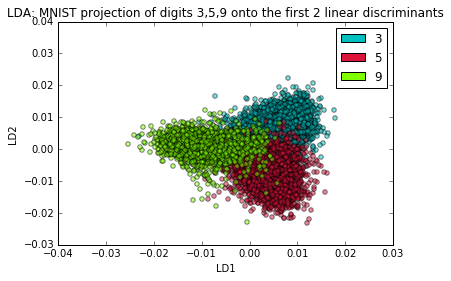

In [59]:
# LDA projection onto 2D

# digit '3'
x_3 = transformed_2[indices_3,0].squeeze()
y_3 = transformed_2[indices_3,1].squeeze()
plt.scatter(x_3, y_3, marker='o', c='c', alpha=0.5)

# digit '5'
x_5 = transformed_2[indices_5,0].squeeze()
y_5 = transformed_2[indices_5,1].squeeze()
plt.scatter(x_5, y_5, marker='o', c='crimson', alpha=0.5)

# digit '9'
x_9 = transformed_2[indices_9,0].squeeze()
y_9 = transformed_2[indices_9,1].squeeze()
plt.scatter(x_9, y_9, marker='o', c='chartreuse', alpha=0.5)

# creates 3 Rectangles
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='c')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='crimson')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='chartreuse')

# adds the legend into plot
plt.legend((p1, p2, p3), ('3', '5', '9'), loc='best')

plt.xlabel('LD1')
plt.ylabel('LD2')

plt.title('LDA: MNIST projection of digits 3,5,9 onto the first 2 linear discriminants')

plt.show()

/Users/matthewtesfaldet/Desktop/project1/.env/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


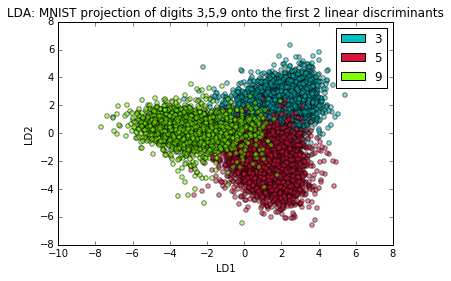

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)

# LDA projection onto 2D

# digit '3'
x_3 = X_lda_sklearn[indices_3,0].squeeze()
y_3 = X_lda_sklearn[indices_3,1].squeeze()
plt.scatter(-x_3, y_3, marker='o', c='c', alpha=0.5)

# digit '5'
x_5 = X_lda_sklearn[indices_5,0].squeeze()
y_5 = X_lda_sklearn[indices_5,1].squeeze()
plt.scatter(-x_5, y_5, marker='o', c='crimson', alpha=0.5)

# digit '9'
x_9 = X_lda_sklearn[indices_9,0].squeeze()
y_9 = X_lda_sklearn[indices_9,1].squeeze()
plt.scatter(-x_9, y_9, marker='o', c='chartreuse', alpha=0.5)

# creates 3 Rectangles
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='c')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='crimson')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='chartreuse')

# adds the legend into plot
plt.legend((p1, p2, p3), ('3', '5', '9'), loc='best')

plt.xlabel('LD1')
plt.ylabel('LD2')

plt.title('LDA: MNIST projection of digits 3,5,9 onto the first 2 linear discriminants')

plt.show()

As we can see between the two implementations of LDA, our implementation is scaled slightly differently yet produces the same relative results. The within-class variance is maximized, as well as the between-class variance. There is much less overlap now. A success!

# Using t-SNE to plot our data
Now we're going to use the Scipy implementation of t-Distributed Stochastic Neighbor Embedding and compare the results with our results from PCA and LDA.

In [29]:
X_train_2500examples = np.vstack((X_train[indices_3][:833],X_train[indices_5][:833],X_train[indices_9][:833]))
Y = util.tsne(X_train_2500examples, 2, 50, 20)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  2499 ...
Computing P-values for point  500  of  2499 ...
Computing P-values for point  1000  of  2499 ...
Computing P-values for point  1500  of  2499 ...
Computing P-values for point  2000  of  2499 ...
Mean value of sigma:  1.95698380914
Iteration  10 : error is  23.6845869163
Iteration  20 : error is  21.6094443072
Iteration  30 : error is  19.2521364627
Iteration  40 : error is  18.0953399143
Iteration  50 : error is  17.9116616436
Iteration  60 : error is  17.912826872
Iteration  70 : error is  17.9239847981
Iteration  80 : error is  17.9306458771
Iteration  90 : error is  17.9375661642
Iteration  100 : error is  17.9423196104
Iteration  110 : error is  2.77966205623
Iteration  120 : error is  2.44713747274
Iteration  130 : error is  2.22330984987
Iteration  140 : error is  2.0683192257
Iteration  150 : error is  1.95460368519
Iteration  160 : error is  1.86693068068
Iteration 

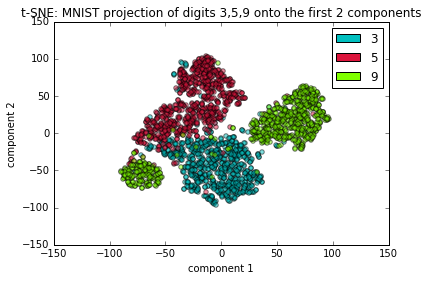

In [42]:
# t-SNE projection onto 2D
y_train_2500examples = np.vstack([np.vstack(y_train[indices_3][:833]),
                                  np.vstack(y_train[indices_5][:833]),
                                  np.vstack(y_train[indices_9][:833])])

indices_3_2500examples = np.where(y_train_2500examples == 3)[0]
indices_5_2500examples = np.where(y_train_2500examples == 5)[0]
indices_9_2500examples = np.where(y_train_2500examples == 9)[0]

# digit '3'
x_3 = Y[indices_3_2500examples,0].squeeze()
y_3 = Y[indices_3_2500examples,1].squeeze()
plt.scatter(x_3, y_3, marker='o', c='c', alpha=0.5)

# digit '5'
x_5 = Y[indices_5_2500examples,0].squeeze()
y_5 = Y[indices_5_2500examples,1].squeeze()
plt.scatter(x_5, y_5, marker='o', c='crimson', alpha=0.5)

# digit '9'
x_9 = Y[indices_9_2500examples,0].squeeze()
y_9 = Y[indices_9_2500examples,1].squeeze()
plt.scatter(x_9, y_9, marker='o', c='chartreuse', alpha=0.5)

# creates 3 Rectangles
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='c')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='crimson')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='chartreuse')

# adds the legend into plot
plt.legend((p1, p2, p3), ('3', '5', '9'), loc='best')

plt.xlabel('component 1')
plt.ylabel('component 2')

plt.title('t-SNE: MNIST projection of digits 3,5,9 onto the first 2 components')

plt.show()